### 1. TF 2.0 and CNN

In [1]:
import tensorflow as tf
print(tf.__version__)
print (tf.executing_eagerly())

2.0.0
True


#### Create tensor 

In [2]:
a = tf.constant([[1,2],
                 [3,4]])
print(a)

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)


#### Broadcasting 

In [3]:
b = tf.add(a,1)
print(b)

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)


#### Matrix multiplication

In [4]:
print(tf.matmul(a,b))

tf.Tensor(
[[10 13]
 [22 29]], shape=(2, 2), dtype=int32)


#### Element-wise multiplication

In [5]:
print(a*b)  

tf.Tensor(
[[ 2  6]
 [12 20]], shape=(2, 2), dtype=int32)


#### Eager execution works perfectly with Numpy, numpy can handel tensor flow objects

In [6]:
import numpy as np
c = np.multiply(a,b)
print(c)

[[ 2  6]
 [12 20]]


#### Transfer a tensor to numpy array using .numpy()

In [7]:
print(a.numpy())

[[1 2]
 [3 4]]


#### Use tf.GradientTape to trace operations for computing gradients

In [8]:
w = tf.Variable([[3.0]])
with tf.GradientTape() as tape:
    loss = w * w
grad = tape.gradient(loss,w)
print(grad)

tf.Tensor([[6.]], shape=(1, 1), dtype=float32)


### Train a model

In [9]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:10000,:,:]
y_train = y_train[:10000]
x_test = x_test[:1000,:,:]
y_test = y_test[:1000]
print (x_train.shape)
print (y_train.shape)
print (x_test.shape)
print (y_test.shape)
print (y_test[:10])

(10000, 28, 28)
(10000,)
(1000, 28, 28)
(1000,)
[7 2 1 0 4 1 4 9 5 9]


In [10]:
import numpy as np
np.max(x_train)

255

In [11]:
### add one column to the dataset to make it 4 dimensions (10000, 28, 28, 1)
x_train = tf.cast(x_train[...,tf.newaxis]/255, tf.float32),
x_test = tf.cast(x_test[...,tf.newaxis]/255, tf.float32),

#### convert the y_train, y_test array using one hot encoding using to_categorical

In [12]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)
print (y_test)
print (y_test.shape)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
(1000, 10)


### Keras method 1: Build the model using tf.keras.Sequential
#### not applicable to ResNet because it skip layers

In [13]:
print (type(x_train))

<class 'tuple'>


In [14]:
mnist_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,[3,3],activation='relu',
                          input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(64,[3,3],activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation="softmax")
])
#32 filters, 3*3 size convolution filters
#Dense= fully connencted network
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

### Keras method 2: Build the model using tf.keras.Model
#### only need to input  inputs and outputs in the model part, it will find the middle layer by itself

In [15]:
inputs = tf.keras.Input(shape=(28,28,1),name="digits")
conv_1 = tf.keras.layers.Conv2D(32,[3,3],activation="relu")(inputs)
conv_2 = tf.keras.layers.Conv2D(64,[3,3],activation="relu")(conv_1)
max_pool = tf.keras.layers.MaxPooling2D()(conv_2)
flattern= tf.keras.layers.Flatten()(max_pool)
outputs = tf.keras.layers.Dense(10,activation="softmax")(flattern)
mnist_model_2 = tf.keras.Model(inputs=inputs,outputs=outputs)
mnist_model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                92170     
Total params: 110,986
Trainable params: 110,986
Non-trainable params: 0
_______________________________________________________

### Train the model Use keras fit method

#### 50 peochs reach accuracy of 0.884 on the test set

In [16]:
mnist_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                    validation_split=0.1,shuffle=True,
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics = ["accuracy"])
mnist_model.fit(x_train,y_train,batch_size=128,epochs=10)
mnist_model.evaluate(x_test,y_test)

Train on 10000 samples
Epoch 1/10
10000/10000 [==============================] - 8s 800us/sample - loss: 2.2975 - accuracy: 0.1395
Epoch 2/10
10000/10000 [==============================] - 8s 784us/sample - loss: 2.2790 - accuracy: 0.1741
Epoch 3/10
10000/10000 [==============================] - 8s 811us/sample - loss: 2.2628 - accuracy: 0.2096
Epoch 4/10
10000/10000 [==============================] - 8s 807us/sample - loss: 2.2409 - accuracy: 0.2461
Epoch 5/10
10000/10000 [==============================] - 8s 812us/sample - loss: 2.2197 - accuracy: 0.2882
Epoch 6/10
10000/10000 [==============================] - 8s 819us/sample - loss: 2.1892 - accuracy: 0.3340
Epoch 7/10
10000/10000 [==============================] - 8s 793us/sample - loss: 2.1562 - accuracy: 0.3612
Epoch 8/10
10000/10000 [==============================] - 8s 803us/sample - loss: 2.1108 - accuracy: 0.3896
Epoch 9/10
10000/10000 [==============================] - 8s 825us/sample - loss: 2.0513 - accuracy: 0.4269
Epoch

[1.9109561986923218, 0.649]

In [18]:
mnist_model_2.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                92170     
Total params: 110,986
Trainable params: 110,986
Non-trainable params: 0
_______________________________________________________

In [186]:
mnist_model_2.compile(tf.keras.optimizers.SGD(learning_rate=1e-3),
                      loss = tf.keras.losses.categorical_crossentropy,
                      validation_split=0.1, shuffle=True,
                     metrics=["accuracy"])

mnist_model_2.fit(x_train,y_train,batch_size=128,epochs=50)
mnist_model_2.evaluate(x_test,y_test)

Train on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 7s 744us/sample - loss: 2.2974 - accuracy: 0.1411
Epoch 2/50
10000/10000 [==============================] - 8s 796us/sample - loss: 2.2788 - accuracy: 0.2311
Epoch 3/50
10000/10000 [==============================] - 8s 792us/sample - loss: 2.2594 - accuracy: 0.3197
Epoch 4/50
10000/10000 [==============================] - 9s 861us/sample - loss: 2.2381 - accuracy: 0.3970
Epoch 5/50
10000/10000 [==============================] - 8s 792us/sample - loss: 2.2132 - accuracy: 0.4657
Epoch 6/50
10000/10000 [==============================] - 8s 817us/sample - loss: 2.1829 - accuracy: 0.5262 - loss: 2.1845 - accu
Epoch 7/50
10000/10000 [==============================] - 8s 809us/sample - loss: 2.1446 - accuracy: 0.5753
Epoch 8/50
10000/10000 [==============================] - 8s 817us/sample - loss: 2.0944 - accuracy: 0.6236
Epoch 9/50
10000/10000 [==============================] - 8s 797us/sample - loss: 2.0270 - 

[0.3770886363983154, 0.878]

### 必须要写Dense(10,activation='softmax')
### 不然用 outputs = tf.keras.layers.Dense(10)(flattern) accuracy 会不变

In [306]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:10000,:,:]
y_train = y_train[:10000]
x_test = x_test[:1000,:,:]
y_test = y_test[:1000]

x_train = tf.cast(x_train[...,tf.newaxis]/255, tf.float32),
x_test = tf.cast(x_test[...,tf.newaxis]/255, tf.float32),

y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)
print (y_test)
print (y_test.shape)


inputs = tf.keras.Input(shape=(None, None, 1),name="digits")
conv_1 = tf.keras.layers.Conv2D(16,[3,3],activation="relu")(inputs)
conv_2 = tf.keras.layers.Conv2D(16,[3,3],activation="relu")(conv_1)
ave_pool = tf.keras.layers.GlobalAveragePooling2D()(conv_2)
#max_pool = tf.keras.layers.MaxPooling2D()(conv_2)
#flattern= tf.keras.layers.Flatten()(max_pool)
##必须要写Dense(10,activation='softmax')
#不然用 outputs = tf.keras.layers.Dense(10)(flattern) accuracy 会不变
outputs = tf.keras.layers.Dense(10,activation='softmax')(ave_pool)
mnist_model_3 = tf.keras.Model(inputs=inputs,outputs=outputs)
mnist_model_3.summary()

#mnist_model_3.compile(tf.keras.optimizers.SGD(learning_rate=1e-3),
#                     loss = tf.keras.losses.categorical_crossentropy,shuffle=True,validation_split=0.1,
#                    metrics=["accuracy"])

#有误 shuffle=True,validation_split=0.1 对accuracy 影响不大
#用tf.keras.optimizers.SGD 还是tf.keras.optimizers.Adam() 也影响不大
mnist_model_3.compile(loss = tf.keras.losses.categorical_crossentropy, 
                     optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

#mnist_model_3.compile(loss = tf.keras.losses.categorical_crossentropy, shuffle=True,validation_split=0.1, 
#                     optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
mnist_model_3.fit(x_train,y_train,batch_size=128,epochs=10)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(10000, 10)
Model: "model_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, None, None, 1)]   0         
_________________________________________________________________
conv2d_274 (Conv2D)          (None, None, None, 16)    160       
_________________________________________________________________
conv2d_275 (Conv2D)          (None, None, None, 16)    2320      
_________________________________________________________________
global_average_pooling2d_59  (None, 16)                0         
_________________________________________________________________
dense_143 (Dense)            (None, 10)                170       
Total params: 2,650
Trainable params: 2,650
Non-trainable params: 0
____________________

In [309]:
mnist_model_3.evaluate(x_test,y_test)

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.6451297664642335, 0.361]

### Train the model Use TF 2.0 

In [23]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:10000,:,:]
y_train = y_train[:10000]
x_test = x_test[:1000,:,:]
y_test = y_test[:1000]

dataset = tf.data.Dataset.from_tensor_slices(
(tf.cast(x_train[...,tf.newaxis]/255, tf.float32),
 tf.cast(y_train,tf.int64)))
#每次缓存1000个然后32个batch 而不是一词放入10000个，当内存比较小的时候，这个就可以train 比较大的数据
dataset = dataset.shuffle(1000).batch(32)

validation = tf.data.Dataset.from_tensor_slices(
(tf.cast(x_test[...,tf.newaxis]/255, tf.float32),
 tf.cast(y_test,tf.int64)))

In [24]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_history = []
#loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
#optimizer = tf.keras.optimizers.Adam()

In [25]:
mnist_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)              

In [26]:
x_train_ = tf.cast(x_train[...,tf.newaxis]/255, tf.float32)
y_train_ = tf.keras.utils.to_categorical(y_train,10)

In [28]:
mnist_model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                    validation_split=0.1,shuffle=True,
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics = ["accuracy"])

In [29]:
for epoch in range(5):
    
    for (batch, (images,labels)) in enumerate (dataset): 
        with tf.GradientTape() as tape:
            
            logits = mnist_model(images,training=True)
            loss_value = loss(labels,logits)
        #train all the paramerters dL/dW
        grads = tape.gradient(loss_value,mnist_model.trainable_variables)
        # update the estiamtes of all parameters using optimizer gradiant descent: w=w-learning_rate*dL/dW
        optimizer.apply_gradients(zip(grads,mnist_model.trainable_variables))
        train_loss = tf.keras.metrics.Mean(name='train_loss')
        train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
        
    print("Epoch {} finishted".format(epoch))
    print (mnist_model.evaluate(x_train_,y_train_))
    print (loss_history)
    #images,labels are x and y inbatces ， should not been used for evaluate

Epoch 0 finishted
10000/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.2931724906921387, 0.1039]
[]
Epoch 1 finishted
10000/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.2823354270935057, 0.1322]
[]
Epoch 2 finishted
10000/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.2710331760406492, 0.1933]
[]
Epoch 3 finishted
10000/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.259213911437988, 0.2647]
[]
Epoch 4 finishted
10000/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.246635495376587, 0.3398]
[]


### 2.回答以下理论题目?

#### 1. Compared to FNN, what is the biggest advantage of CNN?
FNN is fully connect Neural networks. In image analysis, each pixel is connect to neuron in FNN. Since the image size is usually pretty big, there will be too many parameters in FNN and make the network hard to train.
But in CNN, a Convolutional layer(filter) is added between the image and neuron. This can reduce the total number of parameter.

#### 2. Suppose your input is a 100 by 100 gray image, and you use a convolutional layer with 50 filters that are each 5x5. How many parameters does this hidden layer have (including the bias parameters)? 

(5* 5+ 1 bias)* 50 * 1= 26 * 50 =1300

#### 3. What are "local invariant" and "parameter sharing" ?

local invariant means 平移不变性 in Chinese.It means the same filter can identify object in a picture even if the object been shiftted to a different position.

parameter sharing means 参数共享 in Chinese. Parameter sharing scheme is used in Convolutional Layers to control the number of parameters. Filters in CNN will shared the same paramerters. 


https://www.zhihu.com/question/47158818

#### 4. Why we use batch normalization ?
Normalization: We apply normalization to normalized the input valeus for the input layer. Because if we don't normalize the data, the large input might cause instability of the network and cause exploding gradient problem.

Batch normalizatoin applies the normalization process not only on the input layer but also some hidden layers.
This process limit covariate shift for each layer. 

Besides, the appropriate learning rate changes wildly when there are high-order interactions between variables. This means that the magnitude of the higher order interactions are going to be suppressed, allowing larger learning rates to be used.

Additional, batch normalization also has a slight regularization effect. Each mini-batch is scaled by the mean/variance computed on just taht mini-batch. This adds some noise to the values z with that minibatch. But the impact is small, so we don't suggest use it as a standard way of regularization.

Reference：
https://www.youtube.com/watch?v=nUUqwaxLnWs <br>
https://www.youtube.com/watch?v=tNIpEZLv_eg <br>
https://mlexplained.com/2018/01/10/an-intuitive-explanation-of-why-batch-normalization-really-works-normalization-in-deep-learning-part-1/


#### 5. What problem does dropout try to solve ?

Dropout is trying to solve overfitting problem.

#### 6.  Is the following statement correct and why ? "Because pooling layers do not have parameters, they do not affect  the backpropagation(derivatives) calculation"

This statement is not correct. 

When back propagation goes across a max pooling layer, the gradient is processed per example and assigned only to the input from the previous layer that was the maximum. Other inputs get zero gradient.

When back propagation goes across a mean pooling layer, an average of gradient per sample is assigned to the previous layer. 

https://blog.csdn.net/qq_21190081/article/details/72871704
mean pooling的前向传播就是把一个patch中的值求取平均来做pooling，那么反向传播的过程也就是把某个元素的梯度等分为n份分配给前一层，这样就保证池化前后的梯度（残差）之和保持不变. Max pooling也要满足梯度之和不变的原则，max pooling的前向传播是把patch中最大的值传递给后一层，而其他像素的值直接被舍弃掉。那么反向传播也就是把梯度直接传给前一层某一个像素，而其他像素不接受梯度，也就是为0.

### 3. 实践题

#### 3.1 In the first session of the practical part, you will implement an image classification model using any deep learning libraries that you are familiar with,  which means, except for tensorflow and keras, you can also use pytorch/caffe/... .  The dataset used in this session is the cifar10 which contains 50000 color (RGB) images, each with size 32x32x3.  All 50000 images are classified into ten categories. 

In [150]:
import tensorflow as tf
import matplotlib.pyplot as plt

Load the dataset. 

In [151]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

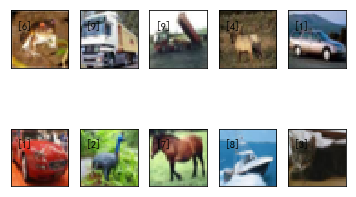

In [152]:
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(x_train[i-1])
    plt.text(3,10,str(y_train[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

##### It is your time to build your model. Try your best to build a model with good performance on the test set.

In [153]:
print (x_train.shape)
print (np.max(x_train))
print (np.unique(y_train))
print (y_train.shape)

(50000, 32, 32, 3)
255
[0 1 2 3 4 5 6 7 8 9]
(50000, 1)


In [154]:
x_train.shape[1:]

(32, 32, 3)

In [155]:
#x_train = tf.cast(x_train[...,tf.newaxis]/255, tf.float32),
#x_test = tf.cast(x_test[...,tf.newaxis]/255, tf.float32),
#print (x_train.shape)
#这个会加一列，导致维度不对

In [156]:
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

print (np.unique(y_train))
print (y_train.shape)

[0. 1.]
(50000, 10)


In [157]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [166]:
cifar10 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,[3,3],activation='relu', padding='same',input_shape=(32,32,3)),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(32,[3,3],activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Conv2D(64,[3,3],activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(64,[3,3],activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    
    
    tf.keras.layers.Conv2D(128,[3,3],activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.Conv2D(128,[3,3],activation='relu',padding='same'),
    tf.keras.layers.BatchNormalization(),
    
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation="softmax")
])
cifar10.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_148 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_84 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_107 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_150 (Conv2D)          (None, 16, 16, 64)      

### accuracy reach accuracy: 0.6370 after 50 epochs

In [169]:
import time
start_time = time.time()

cifar10.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
                    validation_split=0.1,shuffle=True,
                   loss = tf.keras.losses.categorical_crossentropy,
                   metrics = ["accuracy"])
cifar10.fit(x_train,y_train,batch_size=128,epochs=50)
cifar10.evaluate(x_test,y_test)

print ("My program took", time.time() - start_time, "to run")

Train on 50000 samples
Epoch 1/50
50000/50000 [==============================] - 137s 3ms/sample - loss: 1.5510 - accuracy: 0.4371
Epoch 2/50
50000/50000 [==============================] - 132s 3ms/sample - loss: 1.5191 - accuracy: 0.4508
Epoch 3/50
50000/50000 [==============================] - 134s 3ms/sample - loss: 1.4843 - accuracy: 0.4598
Epoch 4/50
50000/50000 [==============================] - 136s 3ms/sample - loss: 1.4648 - accuracy: 0.4677
Epoch 5/50
50000/50000 [==============================] - 142s 3ms/sample - loss: 1.4443 - accuracy: 0.4764
Epoch 6/50
50000/50000 [==============================] - 165s 3ms/sample - loss: 1.4185 - accuracy: 0.4839
Epoch 7/50
50000/50000 [==============================] - 155s 3ms/sample - loss: 1.4044 - accuracy: 0.4901
Epoch 8/50
50000/50000 [==============================] - 158s 3ms/sample - loss: 1.3829 - accuracy: 0.4990
Epoch 9/50
50000/50000 [==============================] - 168s 3ms/sample - loss: 1.3705 - accuracy: 0.5030
Epoch

My program took 6878.027796983719 to run


## option part没有做

### 4. Optional 

##### Do you want to build a CNN from scratch ? 

In this optianl part, you will build a cnn network step by step.

In [24]:
import numpy as np
np.random.seed(1)

##### 4.1 Implement a convolution step

Hints: Numpy.sum function might be useful.

In [21]:
def conv_single_step(a_prev_slice,W,b):
    '''
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    Arguments:
    a_prev_slice: slice of input data (shape=(f,f,n_C_prev))
    W: Weight parameters contained in a window. (shape = (f,f,n_C_prev))
    b: Bias parameters contained in a window. (shape=(1,1,1))
    
    Reutrns:
    
    Z: a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data 
    '''
    # Element-wise product
    s = None
    
    # Sum over s  
    Z = None
    
    # Add bias b to z.
    Z = None
    
    return Z

In [ ]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Use the code above to test your code. If your c
ode is correct, you should be able to get the output shown as below.

<table>
    <tr>
        <td>
            Z
        </td>
        <td>
            -6.99908945068
        </td>
    </tr>

</table>

##### 4.2 Padding

Hints: Numpy.pad function might be useful.

In [ ]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X: python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad: integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad: padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """

    X_pad = None
    
    return X_pad

In [ ]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1,1])
print ("x_pad[1,1] =\n", x_pad[1,1])

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 7, 7, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]
```

##### 4.3 Implement a forward propagation in CNN.

Hints: The formulas to calculate the output shapes are :

$$ n_H = \lfloor \frac{n_{H_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_W = \lfloor \frac{n_{W_{prev}} - f + 2 \times pad}{stride} \rfloor +1 $$
$$ n_C = \text{number of filters used in the convolution}$$

In [ ]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev: output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W: Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b: Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters: python dictionary containing "stride" and "pad"
        
    Returns:
    Z: conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache: cache of values needed for the conv_backward() function
    """
    
    # Get dimensions from A_prev's shape  
    (m, n_H_prev, n_W_prev, n_C_prev) = None
    
    # Get dimensions from W's shape 
    (f, f, n_C_prev, n_C) = None
    
    # Get information from "hparameters" 
    stride = None
    pad = None
    
    # Compute the dimensions of the CONV output volume using the formula given above. 
    # Hint: use int() to apply the 'floor' operation. 
    n_H = None
    n_W = None
    
    # Initialize the output volume Z with zeros. 
    Z = None
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = None
    
    for i in range(None):               # loop over the batch of training examples
        a_prev_pad = None               # Select ith training example's padded activation
        for h in range(None):           # loop over vertical axis of the output volume
            # Find the vertical start and end of the current "slice" 
            vert_start = None
            vert_end = None
            
            for w in range(None):       # loop over horizontal axis of the output volume
                # Find the horizontal start and end of the current "slice"
                horiz_start = None
                horiz_end = None
                
                for c in range(None):   # loop over channels (= #filters) of the output volume
                                        
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). 
                    a_slice_prev = None
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. 
                    weights = None
                    biases = None
                    Z[i, h, w, c] = None
                                        
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(10,5,7,4)
W = np.random.randn(3,3,4,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =\n", np.mean(Z))
print("Z[3,2,1] =\n", Z[3,2,1])
print("cache_conv[0][1][2][3] =\n", cache_conv[0][1][2][3])

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
Z's mean =
 0.692360880758
Z[3,2,1] =
 [ -1.28912231   2.27650251   6.61941931   0.95527176   8.25132576
   2.31329639  13.00689405   2.34576051]
cache_conv[0][1][2][3] = [-1.1191154   1.9560789  -0.3264995  -1.34267579]
```

##### 4.4 Pooling layers

Hints: As there\'s no padding, the formulas binding the output shape of the pooling to the input shape is:

$$ n_H = \lfloor \frac{n_{H_{prev}} - f}{stride} \rfloor +1 $$

$$ n_W = \lfloor \frac{n_{W_{prev}} - f}{stride} \rfloor +1 $$

$$ n_C = n_{C_{prev}}$$

In [ ]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev: Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters: python dictionary containing "f" and "stride"
    mode: the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A: output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache: cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Get dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Get hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    for i in range(None):                         # loop over the training examples
        for h in range(None):                     # loop on the vertical axis of the output volume
            # Find the vertical start and end of the current "slice" (≈2 lines)
            vert_start = None
            vert_end = None
            
            for w in range(None):                 # loop on the horizontal axis of the output volume
                # Find the vertical start and end of the current "slice" (≈2 lines)
                horiz_start = None
                horiz_end = None
                
                for c in range (None):            # loop over the channels of the output volume
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = None
                    
                    # Compute the pooling operation on the slice. 
                    # Use an if statement to differentiate the modes. 
                    # Use np.max and np.mean.
                    if mode == "max":
                        A[i, h, w, c] = None
                    elif mode == "average":
                        A[i, h, w, c] = None
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache

In [ ]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A =\n", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A =\n", A)

Use the code above to test your code. If your code is correct, you should be able to get the output shown as below.

```
mode = max
A.shape = (2, 3, 3, 3)
A =
 [[[[ 1.74481176  0.90159072  1.65980218]
   [ 1.74481176  1.46210794  1.65980218]
   [ 1.74481176  1.6924546   1.65980218]]

  [[ 1.14472371  0.90159072  2.10025514]
   [ 1.14472371  0.90159072  1.65980218]
   [ 1.14472371  1.6924546   1.65980218]]

  [[ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.51981682  2.18557541]
   [ 1.13162939  1.6924546   2.18557541]]]


 [[[ 1.19891788  0.84616065  0.82797464]
   [ 0.69803203  0.84616065  1.2245077 ]
   [ 0.69803203  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.84616065  1.27375593]
   [ 1.96710175  0.84616065  1.23616403]
   [ 1.62765075  1.12141771  1.2245077 ]]

  [[ 1.96710175  0.86888616  1.27375593]
   [ 1.96710175  0.86888616  1.23616403]
   [ 1.62765075  1.12141771  0.79280687]]]]

mode = average
A.shape = (2, 3, 3, 3)
A =
 [[[[ -3.01046719e-02  -3.24021315e-03  -3.36298859e-01]
   [  1.43310483e-01   1.93146751e-01  -4.44905196e-01]
   [  1.28934436e-01   2.22428468e-01   1.25067597e-01]]

  [[ -3.81801899e-01   1.59993515e-02   1.70562706e-01]
   [  4.73707165e-02   2.59244658e-02   9.20338402e-02]
   [  3.97048605e-02   1.57189094e-01   3.45302489e-01]]

  [[ -3.82680519e-01   2.32579951e-01   6.25997903e-01]
   [ -2.47157416e-01  -3.48524998e-04   3.50539717e-01]
   [ -9.52551510e-02   2.68511000e-01   4.66056368e-01]]]


 [[[ -1.73134159e-01   3.23771981e-01  -3.43175716e-01]
   [  3.80634669e-02   7.26706274e-02  -2.30268958e-01]
   [  2.03009393e-02   1.41414785e-01  -1.23158476e-02]]

  [[  4.44976963e-01  -2.61694592e-03  -3.10403073e-01]
   [  5.08114737e-01  -2.34937338e-01  -2.39611830e-01]
   [  1.18726772e-01   1.72552294e-01  -2.21121966e-01]]

  [[  4.29449255e-01   8.44699612e-02  -2.72909051e-01]
   [  6.76351685e-01  -1.20138225e-01  -2.44076712e-01]
   [  1.50774518e-01   2.89111751e-01   1.23238536e-03]]]]
```

####  Congratulations! You hanve finished the assignment 6.  You now understand how convolutional neural networks work.